# Using the mesh object 
first of all import relevant dependencies 

In [2]:
#import conda libraries 
import numpy as np 
import matplotlib.pyplot as plt
#import R2 API libraries
import sys
import os
sys.path.append(os.path.relpath('../src'))
import api.meshTools as mt
import api.gmshWrap as gw

For this example we are pretending that we have a hill slope on which are doing our survey. The following sets up a basic slope with electrodes, using a couple of handy numpy functions. 

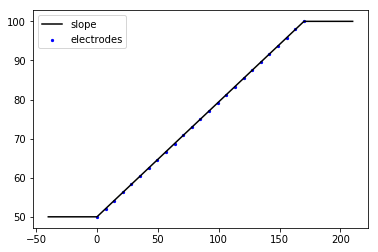

In [3]:
#set up mock up geometry of an ERT survey on a slope 
surf_x=[-40, 0 , 170, 210]
surf_y=[50,50,100,100]

# lets pretend to put electrodes on the slope 
elec_x=np.linspace(0,170,25)#electrode x positions 
#interpolate electrode y positions 
elec_y = np.interp(elec_x,surf_x,surf_y)

#make a plot of what this slope looks like 
plt.plot(surf_x,surf_y,'k')
plt.scatter(elec_x,elec_y,5,'b')
plt.legend(("slope","electrodes"))

## Triangular mesh of survey
the tri_mesh function acts a wrapper for gmsh. The workflow here uses functions in the gmshWrap module:

1. gengeofile takes electrode positions and topography to generate an input script for gmsh
2. gmsh2r2msh then converts the output of gmsh into a mesh.dat file which is readable by R2

tri mesh simply combines the above 2 functions and calls gmsh using an os command line 

In [5]:
#call gmshWrap module
tri_mesh = mt.tri_mesh(surf_x,surf_y,elec_x,elec_y)#returns a mesh object

# show mesh daignostics
tri_mesh.summary()


exe dir = /media/jkl/data/phd/tmp/pyr2/src/api/exe
Generating gmsh input file...



TypeError: 'geom_input' is not a dictionary type object. Dict type is expected for the first argument of genGeoFile_adv

The orginal file path here shows which file the mesh object was created from. Actaully the .geo and .msh file are deleted once mesh.dat has been written (as they're not needed anymore), it's possible to keep the files by passing "keep_files = True " as argument in tri_mesh. 

#### looking at the mesh
Axis limits - defines the the view we get when showing the mesh, otherwise the whole mesh will be displayed. Note that when inverting resistivity data we generate a "nuemonn boundary" (background region), such that an infinite earth assumption isn't voilated. 

In [4]:
#axis limits
xlim=(min(surf_x)-20,max(surf_x)+20)
ylim=(0,110)

when showing the mesh we haven't actually inverted anything, so it just shows the material assigned to the mesh elements by gmsh.

In [5]:
tri_mesh.show(xlim=xlim,ylim=ylim) 

NameError: name 'tri_mesh' is not defined

## Quad type mesh 
The workflow is similar to before but we dont need to call gmsh to make the mesh, since quad meshes are simpler to make we can use a meshTools function quad_mesh, which uses some numpy functions (linspace, arange, logspace etc... ) to generate a quadrilateral mesh. 

In [9]:
# generate a quad mesh 
qmesh,meshx,meshy,topo,e_nodes = mt.quad_mesh(elec_x,elec_y)#take electrode positions only (may update in future)
#mesh object, x node coordinates, y node coordinates, topography, x coordinate nodes with electrodes

As before lets have a look at some diagnostics and what the mesh looks like (again we havent inverted anything so the mesh is just blank)


_______mesh summary_______
Number of elements: 5544
Number of nodes: 5715
Attribute title: no attribute
Number of cell vertices: 4
Number of cell attributes: 1
original file path: N/A


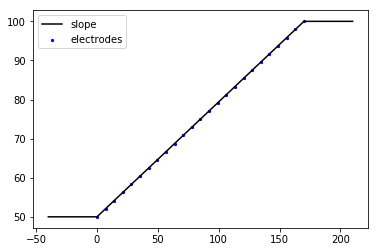

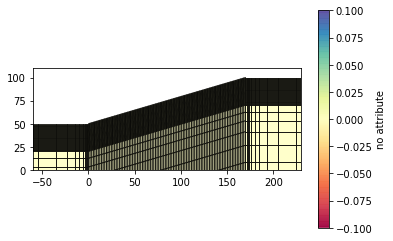

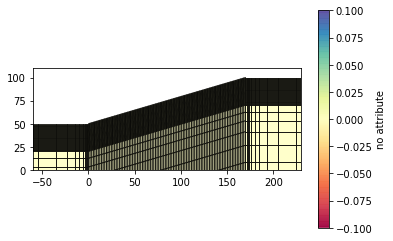

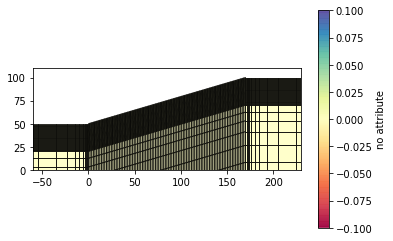

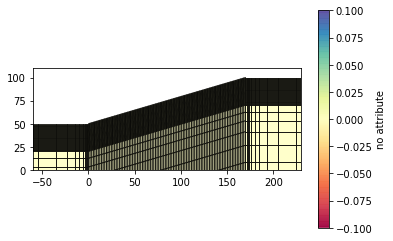

In [11]:
#show the quad mesh 
qmesh.summary()
plt.ion()
qmesh.show(xlim=xlim,ylim=ylim)
